<a href="https://colab.research.google.com/github/amanullahshah32/Deep-Learning/blob/main/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **0. Architecture of a classification neural network**

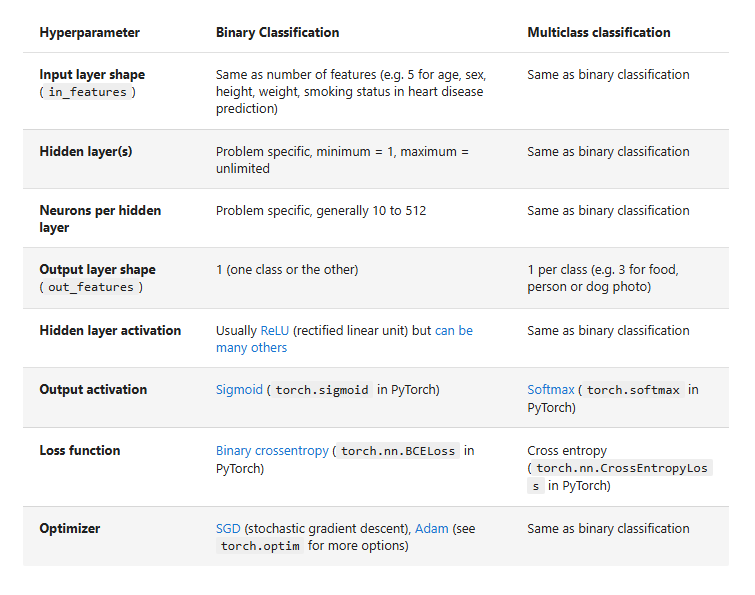

## **1. Make classification data and get it ready**

We'll use the make_circles() method from Scikit-Learn to generate two circles with different coloured dots.



In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03, # a little bit of noise to the dots
                    random_state = 42)

In [2]:
print(f"first 5 X values; {X[:5]}\n")
print(f"first 5 y values; {y[:5]}")

first 5 X values; [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

first 5 y values; [1 1 1 1 0]


Let's keep following the data explorer's motto of visualize, visualize, visualize and put them into a pandas DataFrame.



In [3]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y
                        })

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [4]:
# Check different labels
circles.label.value_counts()

,count
label,
1,500
0,500


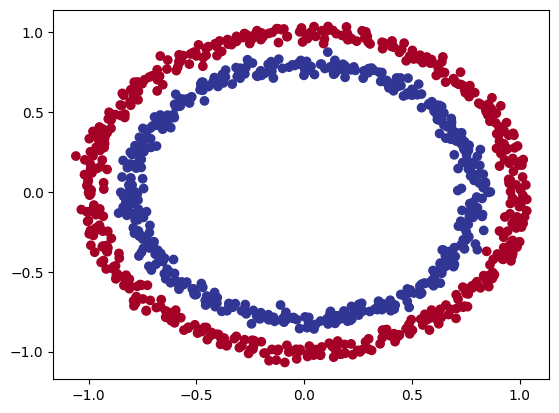

In [5]:
# Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

Let's find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1).



### **1.1 Input and Output shapes**

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View the first example of features and labels
X_sample  = X[0]
y_sample  = y[0]

print(f"Values for one sample of X: {X_sample}\n")
print(f"Shapes for one sample of X: {X_sample.shape}\n")
print(f"\n Values for one sample of y: {y_sample}\n")
print(f"Shapes for one sample of y: {y_sample.shape}\n")



Values for one sample of X: [0.75424625 0.23148074]

Shapes for one sample of X: (2,)


 Values for one sample of y: 1

Shapes for one sample of y: ()



This tells us the second dimension for X means it has two features (vector) where as y has a single feature (scalar).

We have two inputs for one output.

### **1.2 Turn data into tensors and create train and test splits**

1. Turn our data into tensors (right now our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).
2. Split our data into training and test sets (we'll train a model on the training set to learn the patterns between X and y and then evaluate those learned patterns on the test dataset).

In [8]:
# Turn data into tensors
# Otherwise this causes issues with computations later on

import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
# Split data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# check the length of train, test splits
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## **2. Building a model**

We'll break it down into a few parts.

Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
* Constructing a model by subclassing nn.Module.
* Defining a loss function and optimizer.
* Creating a training loop (this'll be in the next section).

In [10]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Let's create a model class that:

1. Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
2. Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
3. Defines a forward() method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target device.

In [11]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.Linear layers capable of handling X and Y input and output shapes
    self.layer_1 = nn.Linear(in_features = 2, out_features= 5) # takes in 2 features (x) , priduces 5 features
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # takes in 5 features , produces 1 feature jy

  # 3. Define a forward method containing the forward pass computation
  def forward(self,x):
    # Return the output of layer_2 , a single feature, the same shape as y
    return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2



# 4. create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

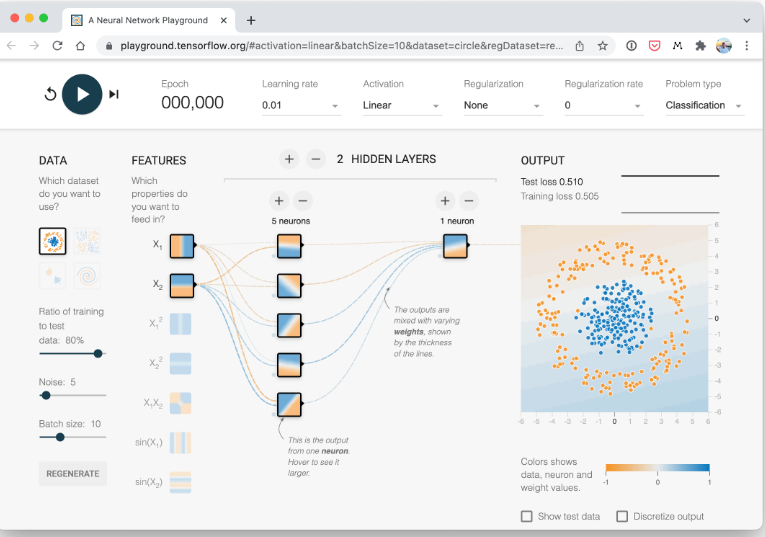

A visual example of what a similar classificiation neural network to the one we've just built looks like. Try create one of your own on the TensorFlow Playground website. : https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.35990&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

`nn.Sequential` performs a forward pass computation of the input data through the layers in the order they appear

In [12]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features= 5),
    nn.Linear(in_features = 5, out_features= 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

Now we've got a model, let's see what happens when we pass some data through it.



In [13]:
# Make predictions with the model

untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}\n")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\n First 10 predictions: \n{untrained_preds[:10]}")
print(f"\n First 10 test labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])

Length of test samples: 200, Shape: torch.Size([200])

 First 10 predictions: 
tensor([[-0.3970],
        [-0.3674],
        [-0.4515],
        [-0.3817],
        [-0.4146],
        [-0.3968],
        [-0.3425],
        [-0.3493],
        [-0.4530],
        [-0.3650]], device='cuda:0', grad_fn=<SliceBackward0>)

 First 10 test labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### **2.1 Setup loss function and optimizer**

 the stochastic gradient descent optimizer `(SGD, torch.optim.SGD())` can be used for a range of problems, and the same applies to the Adam optimizer `(torch.optim.Adam())`.

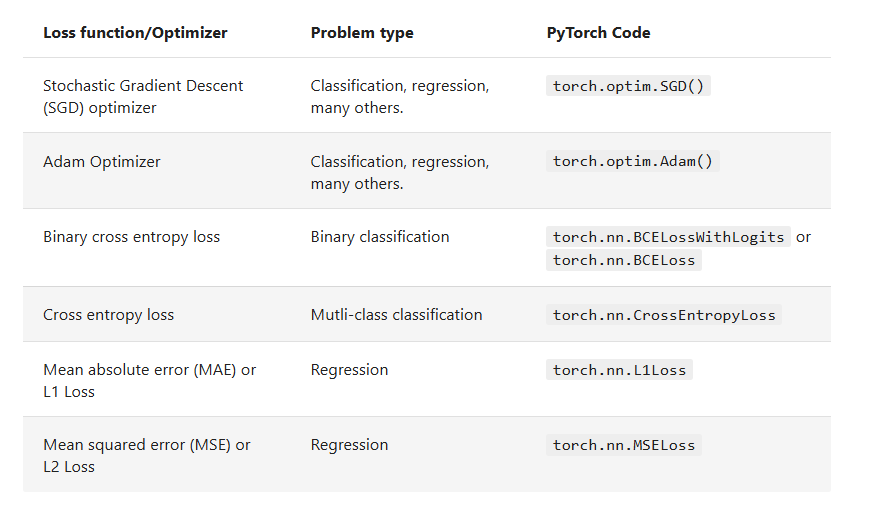

PyTorch has two binary cross entropy implementations:

1. torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in (we'll see what this means soon).

In [14]:
# Create a loss function
# Loss_fn = nn.BCELoss() # BCELoss = no sigmoid built it
loss_fn = nn.BCEWithLogitsLoss() # BSEWithLogitsLoss = sigmoid built in

# Create an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

Now let's also create an evaluation metric.

Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions.



In [15]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are euqal
  acc = (correct / len(y_pred)) * 100
  return acc

## **3. Train Model**

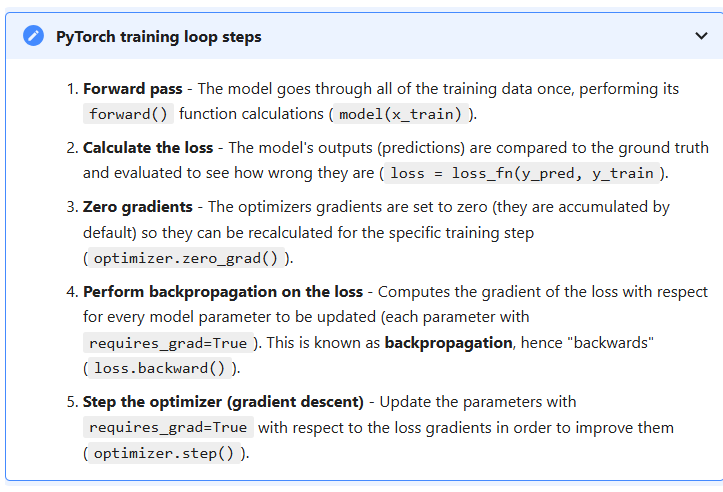

### 3.1 Going from raw model outputs to predicted labels (logits -> prediciotn probabilites -> predictioan labels)

In [16]:
# View the first 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3970],
        [-0.3674],
        [-0.4515],
        [-0.3817],
        [-0.4146]], device='cuda:0', grad_fn=<SliceBackward0>)

y
=
x
⋅
W
e
i
g
h
t
s
T
+
b
i
a
s

The raw outputs (unmodified) of this equation (
y
 ) and in turn, the raw outputs of our model are often referred to as logits.

To get our model's raw outputs (logits) into such a form, we can use the sigmoid activation function.

In [17]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4020],
        [0.4092],
        [0.3890],
        [0.4057],
        [0.3978]], device='cuda:0', grad_fn=<SigmoidBackward0>)

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

If y_pred_probs >= 0.5, y=1 (class 1)


If y_pred_probs < 0.5, y=0 (class 0)

In [18]:
# Find the predicted labels (round the prediction probabilites )
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# CHeck for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

### 3.2 Building a training and testing loop

Let's start by training for 100 epochs and outputting the model's progress every  10 epochs

In [19]:
torch.manual_seed(42)

# Set the number of epochs
epochs  = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### training
  model_0.train()

  # 1. Forward pass (model outputs raw logits)
  y_logits= model_0(X_train).squeeze() # Squeeze to remove extra 1 dimension, this wont work unless model and data are on same device
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits ->  pred prbs -> pred labels

  #3 Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), y_train) # using nn.BCELoss you need torch.sigmoid()
  loss = loss_fn(y_logits, y_train) # using nn.BCEWithLogitsLoss works with raw logits

  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backwards
  loss.backward()

  # 5. optimizer step
  optimizer.step()


  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass:
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate loss/accuracy
    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true=y_test, y_pred = test_pred)

    # Print out what's happening in every 10 epochs
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.71348, Acc: 50.00% | Test Loss: 0.71243, Test Acc: 50.00%
Epoch: 10 | Loss: 0.69976, Acc: 50.00% | Test Loss: 0.69904, Test Acc: 50.00%
Epoch: 20 | Loss: 0.69553, Acc: 50.00% | Test Loss: 0.69466, Test Acc: 50.00%
Epoch: 30 | Loss: 0.69418, Acc: 50.00% | Test Loss: 0.69322, Test Acc: 50.00%
Epoch: 40 | Loss: 0.69370, Acc: 50.00% | Test Loss: 0.69276, Test Acc: 50.00%
Epoch: 50 | Loss: 0.69350, Acc: 50.00% | Test Loss: 0.69267, Test Acc: 50.00%
Epoch: 60 | Loss: 0.69338, Acc: 44.50% | Test Loss: 0.69271, Test Acc: 45.50%
Epoch: 70 | Loss: 0.69331, Acc: 44.88% | Test Loss: 0.69280, Test Acc: 46.50%
Epoch: 80 | Loss: 0.69325, Acc: 50.00% | Test Loss: 0.69291, Test Acc: 50.00%
Epoch: 90 | Loss: 0.69320, Acc: 50.00% | Test Loss: 0.69303, Test Acc: 50.00%


## **4. Make predictions and evaluate the model**

In [20]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

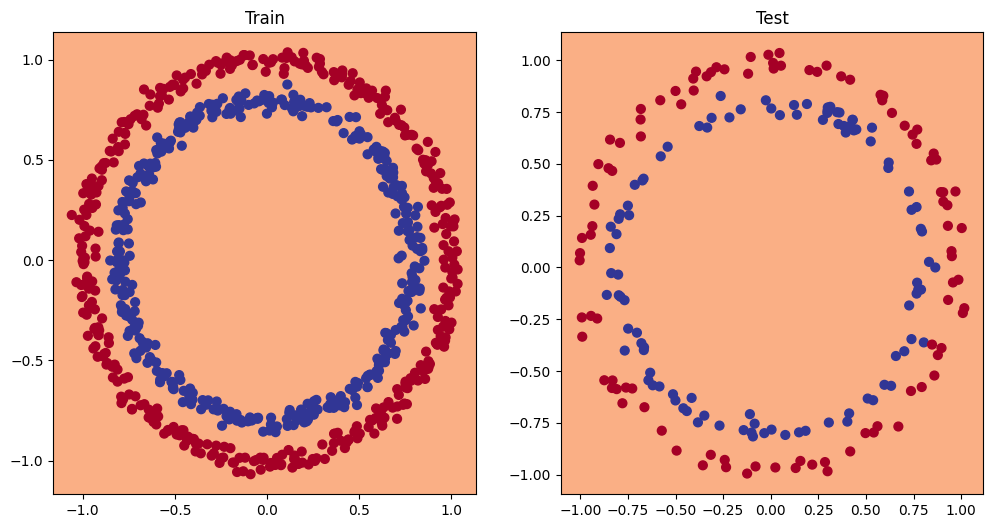

In [21]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## **5. Improving a model (from a model prespective)**

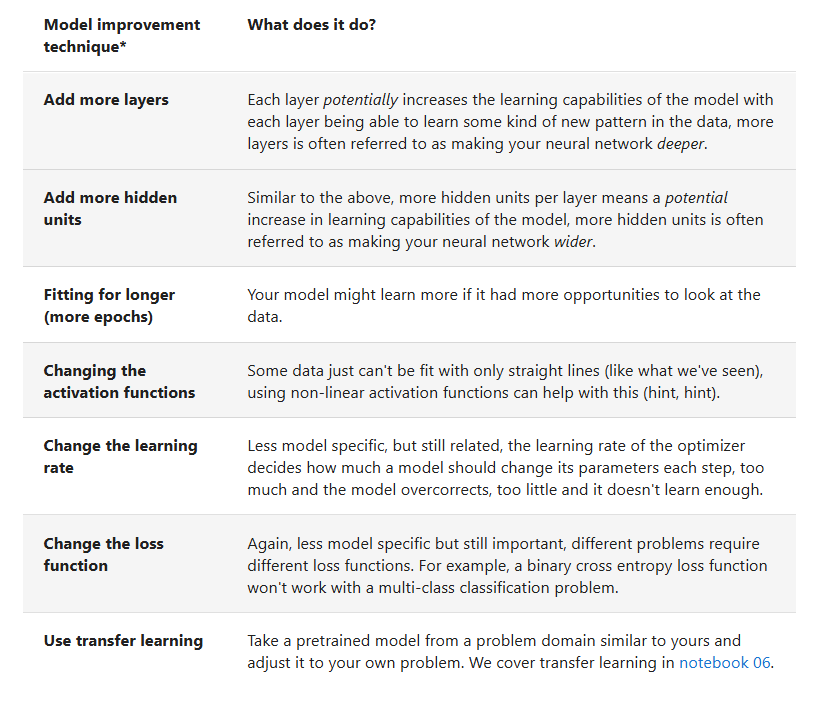

In [22]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features= 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features= 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features= 10, out_features = 1)
    #
    #self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))
    #return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

Now, we've got a model, we'll recreate a loss function and optimizer instance, using the same settings as before

In [23]:
# Loss_fn = nn.BCELoss() # requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(), lr = 0.1)

 loss function and optimizer are ready.

lets create a training loop

In [24]:
X_train.shape

torch.Size([800, 2])

In [25]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


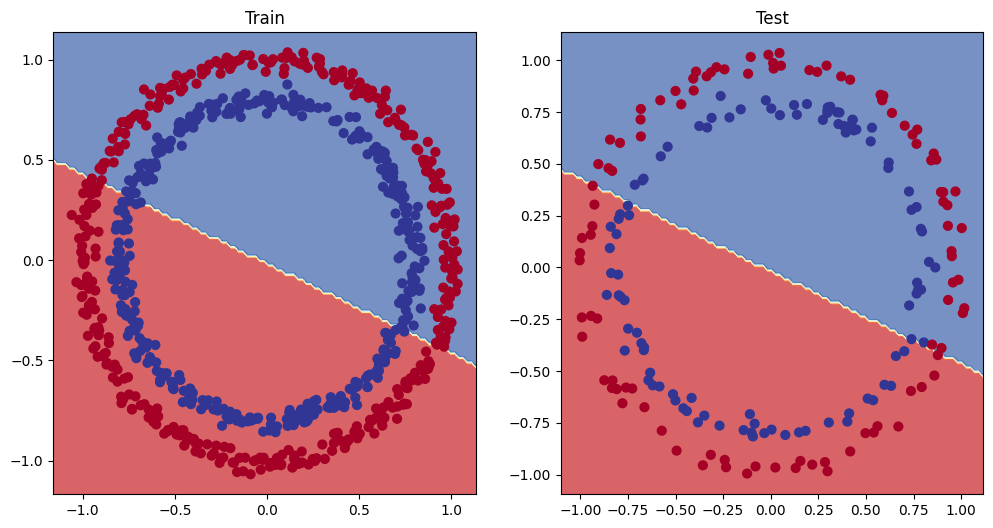

In [26]:
# Lets visualize
# plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test, y_test)

### **5.1 Preparing data to see if our model can model a straight line**

In [27]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start,end, step, dtype=(torch.float32)).unsqueeze(dim= 1)
y_regression = weight*X_regression + bias # linear regression formula

# CHeck the data
print(len(X_regression))
print(len(y_regression))

print(f"\n {X_regression[:5]} , \n {y_regression[:5]}")

100
100

 tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]]) , 
 tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280]])


In [28]:
X_regression.dtype

torch.float32

wonderful, now let's split our data into training and test sets

In [29]:
# Create train and test splits
train_split = int(0.8*len(X_regression)) # 80% of data used for training set
X_train_regression , y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]


# Check the lenghts of each split
print(len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression))

80 80 20 20


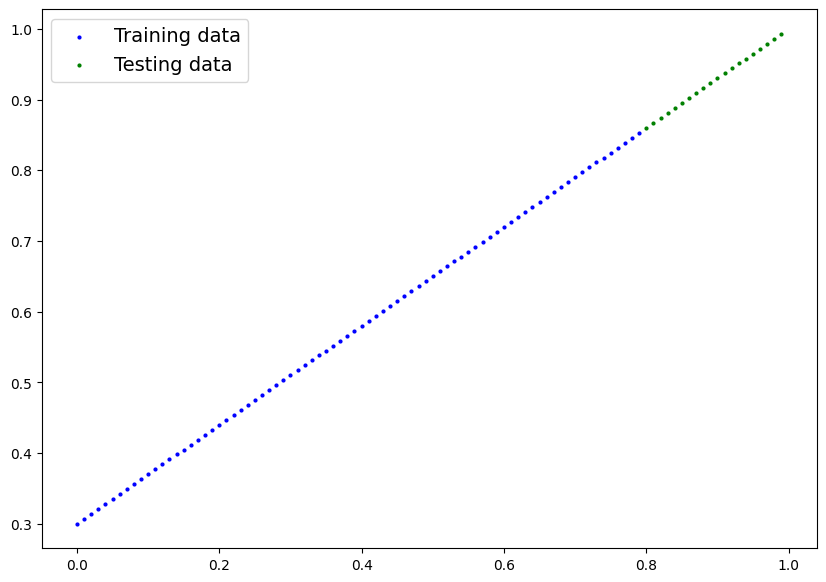

In [30]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

### **5.2 Adjusting `model_1` to fit a straight line**

In [31]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1),
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
# Loss and Optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr= 0.1)

Now let's train the model using the regular training loop steps for epochs = 1000

In [33]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  ### training
  # 1. Forward pass
  y_pred = model_2(X_train_regression)

  # Calculate the loss (no accuracy since its a regression problem)
  loss = loss_fn(y_pred, y_train_regression)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_pred = model_2(X_test_regression)

    # 2. calculate the loss
    test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss:5f} | Test loss: {test_loss:5f}")

Epoch: 0 | Train loss: 0.759859 | Test loss: 0.541428
Epoch: 100 | Train loss: 0.093087 | Test loss: 0.029012
Epoch: 200 | Train loss: 0.073757 | Test loss: 0.028500
Epoch: 300 | Train loss: 0.067450 | Test loss: 0.006152
Epoch: 400 | Train loss: 0.061067 | Test loss: 0.020039
Epoch: 500 | Train loss: 0.056981 | Test loss: 0.010607
Epoch: 600 | Train loss: 0.048566 | Test loss: 0.013263
Epoch: 700 | Train loss: 0.061085 | Test loss: 0.021267
Epoch: 800 | Train loss: 0.055993 | Test loss: 0.014257
Epoch: 900 | Train loss: 0.055710 | Test loss: 0.006034


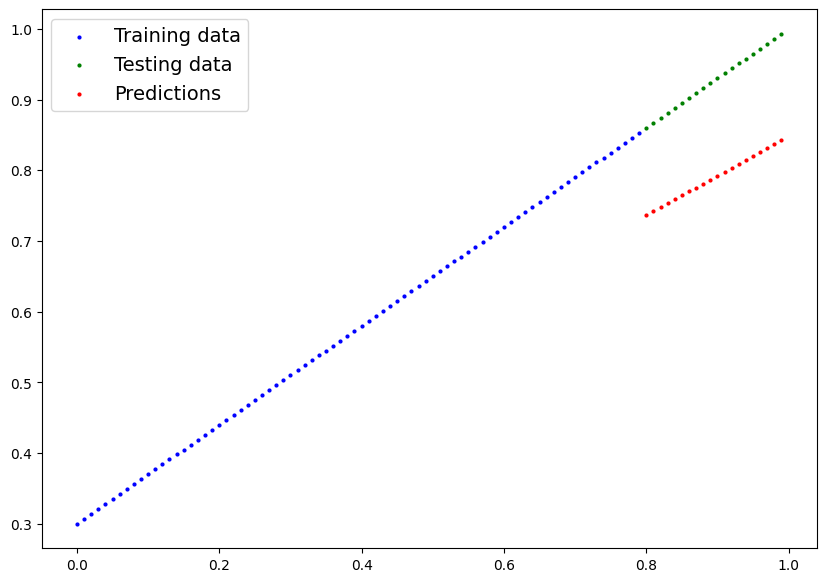

In [34]:
# Turn on evaluation mode
model_2.eval()

# maake predictions ( inference )
with torch.inference_mode():
  y_preds = model_2(X_test_regression)


# Plot data and predicitons with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() fromone of the below code and see what happens)

plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 predictions = y_preds.cpu())

## **6. The missing piece: non-linearity**

### 6.1 Recreating non-linear data (red and blue circles)

(-1.1641631705326736,
 1.1383724631691474,
 -1.1729569179662098,
 1.1411922753098467)

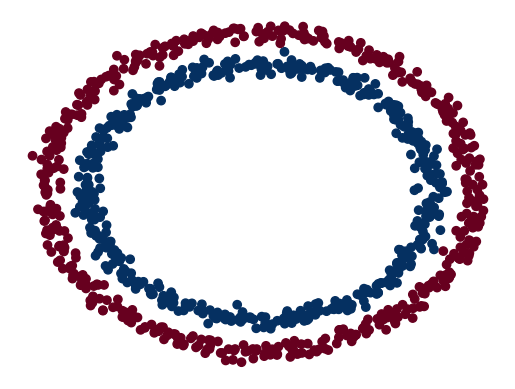

In [35]:
# Make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples = n_samples, noise = 0.03, random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdBu)
plt.axis(False)

 Now let's split it into training and test sets using 80% of the data for training and 20% for testing.

In [36]:
# Convert to tensors and split into train and tests sets
import torch
from sklearn.model_selection import train_test_split
# Turn data into tensors
X= torch.from_numpy(X).type(torch.float32)
y= torch.from_numpy(y).type(torch.float32)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## **6.2 Building a model with non-linearity**

In [37]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features= 10, out_features = 1)
    self.relu = nn.ReLU()  # add in ReLu actiavtion function

  def forward(self, x):
    # Intersperse the ReLU activation function between layers
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

**Question:** Where should I put the non-linear activation functions when constructing a neural network?

*A rule of thumb is to put them in between hidden layers and just after the output layer, however, there is no set in stone option. As you learn more about neural networks and deep learning you'll find a bunch of different ways of putting things together. In the meantine, best to experiment, experiment, experiment.*

Now we've got a model ready to go, let's create a binary classification loss function as well as an optimizer

In [38]:
# Setup loss and optimzizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.1)

### **6.3 Trianing a model with non-linearity**

You know the drill, model, loss function, optimizer ready to go, let's create a training and testing loop.



In [39]:
# Fit the model
torch.manual_seed(42)

epochs = 10000

# Put all data on target device
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predictions probabilities  -> prediction labels

  # 2. Calcualte loss and accuracy
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()


  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits= model_3(X_test).squeeze()
    test_pred  = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilites -> prediction labels
    # 2. Calculate loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f} | Test_loss : {test_loss:5f} | Test_Accuracy: {test_acc:5f}")

Epoch : 0 | Loss: 0.69295 | Accuracy: 50.00 | Test_loss : 0.693188 | Test_Accuracy: 50.000000
Epoch : 100 | Loss: 0.69115 | Accuracy: 52.88 | Test_loss : 0.691024 | Test_Accuracy: 52.500000
Epoch : 200 | Loss: 0.68977 | Accuracy: 53.37 | Test_loss : 0.689396 | Test_Accuracy: 55.000000
Epoch : 300 | Loss: 0.68795 | Accuracy: 53.00 | Test_loss : 0.687232 | Test_Accuracy: 56.000000
Epoch : 400 | Loss: 0.68517 | Accuracy: 52.75 | Test_loss : 0.684115 | Test_Accuracy: 56.500000
Epoch : 500 | Loss: 0.68102 | Accuracy: 52.75 | Test_loss : 0.679412 | Test_Accuracy: 56.500000
Epoch : 600 | Loss: 0.67515 | Accuracy: 54.50 | Test_loss : 0.672851 | Test_Accuracy: 56.000000
Epoch : 700 | Loss: 0.66659 | Accuracy: 58.38 | Test_loss : 0.663216 | Test_Accuracy: 59.000000
Epoch : 800 | Loss: 0.65160 | Accuracy: 64.00 | Test_loss : 0.647569 | Test_Accuracy: 67.500000
Epoch : 900 | Loss: 0.62362 | Accuracy: 74.00 | Test_loss : 0.621453 | Test_Accuracy: 79.000000
Epoch : 1000 | Loss: 0.56818 | Accuracy: 8

### **6.4 Evaluating a model trained with non-linear activation functions**

In [40]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

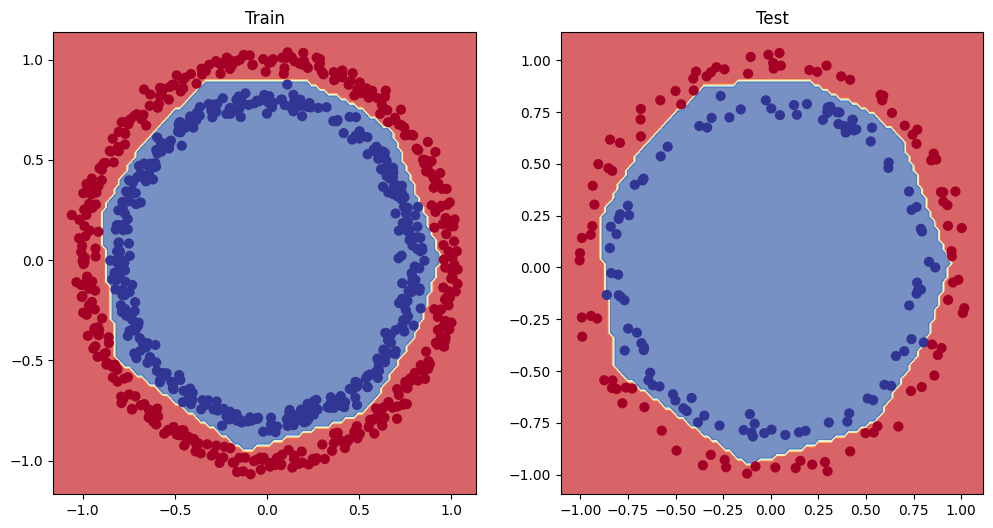

In [41]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

##  **7. Replicating non-linear activation functions**

what does a non-linear activation look like?

How about we replicate some and what they do?

Let's start by creating a small amount of data.

In [42]:
# Create a toy tensor (similar to the data going into our model)
A = torch.arange(-10,10,1, dtype=torch.float32)
len(A)

20

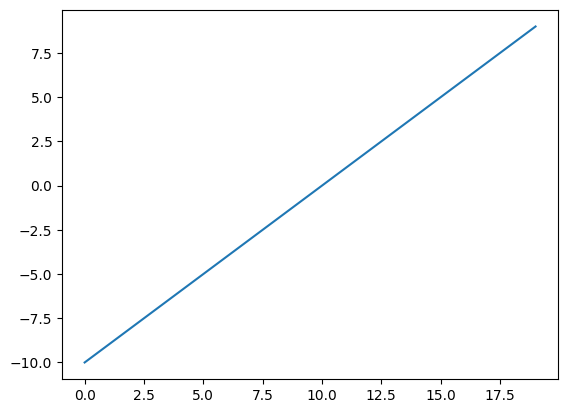

In [43]:
# Now let's plot it
# Visualize the toy tensor
plt.plot(A)

Now let's see how the ReLU activation function influences it.

And instead of using PyTorch's ReLU (torch.nn.ReLU), we'll recreate it ourselves

In [44]:
# Create ReLu function by hand
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

it looks like our ReLU function worked, all of the negetive values are zeros

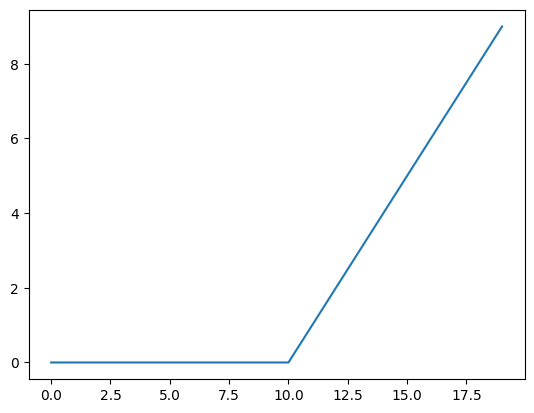

In [45]:
# Plot ReLU activated toy tensor
plt.plot(relu(A))

let's build a function to replicate the sigmoid function with PyTorch.

In [46]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1/(1+torch.exp(-x))

# Test custom sigmoid on toy tensor
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

In [47]:
device

'cuda'

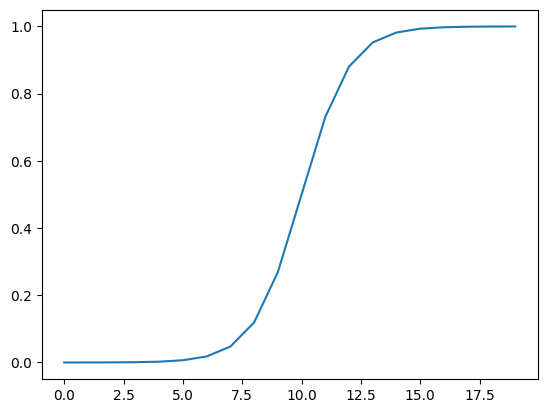

In [48]:
# Plot sigmoid activated toy tensor
plt.plot(sigmoid(A))

## **8. Putting things together by building a multi-class PyTorch model**

### **8.1 Creating multi calss classification data**

o begin a multi-class classification problem, let's create some multi-class data.

To do so, we can leverage Scikit-Learn's make_blobs() method.

This method will create however many classes (using the centers parameter) we want.

Specifically, let's do the following:

1. Create some multi-class data with make_blobs().
2. Turn the data into tensors (the default of make_blobs() is to use NumPy arrays).
3. Split the data into training and test sets using train_test_split().
4. Visualize the data.

In [49]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [50]:
# Set the number of hyperparameters for data creation
Num_Classes = 4
Num_Features = 2
Random_Seed = 42

# 1. Create a multi class data
X_blob, y_blob = make_blobs(1000, # number of samples
                            n_features= 2, # number of featuers
                            centers = 4, # number of classes
                            cluster_std = 1.5, # give the clusters a little shake up (try changing this to 1.0, the deafault)                            random_state = 42
                            )



In [51]:
y_blob.dtype, X_blob.dtype

(dtype('int64'), dtype('float64'))

In [52]:
# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.long)
print(X_blob[:5], y_blob[:5])

tensor([[  0.8404,  -6.3936],
        [  0.1815,  -8.2886],
        [ -1.6418, -10.6515],
        [  3.5023,   0.7654],
        [ -1.1233,  -8.4525]]) tensor([0, 3, 3, 0, 3])


In [53]:
# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size = 0.2, random_state = 42) # ,shuffle = True


In [54]:
print(y_blob_train.dtype)  # Should be torch.int64 (LongTensor)
print(y_blob_test.dtype)   # Should be torch.int64 (LongTensor)


torch.int64
torch.int64


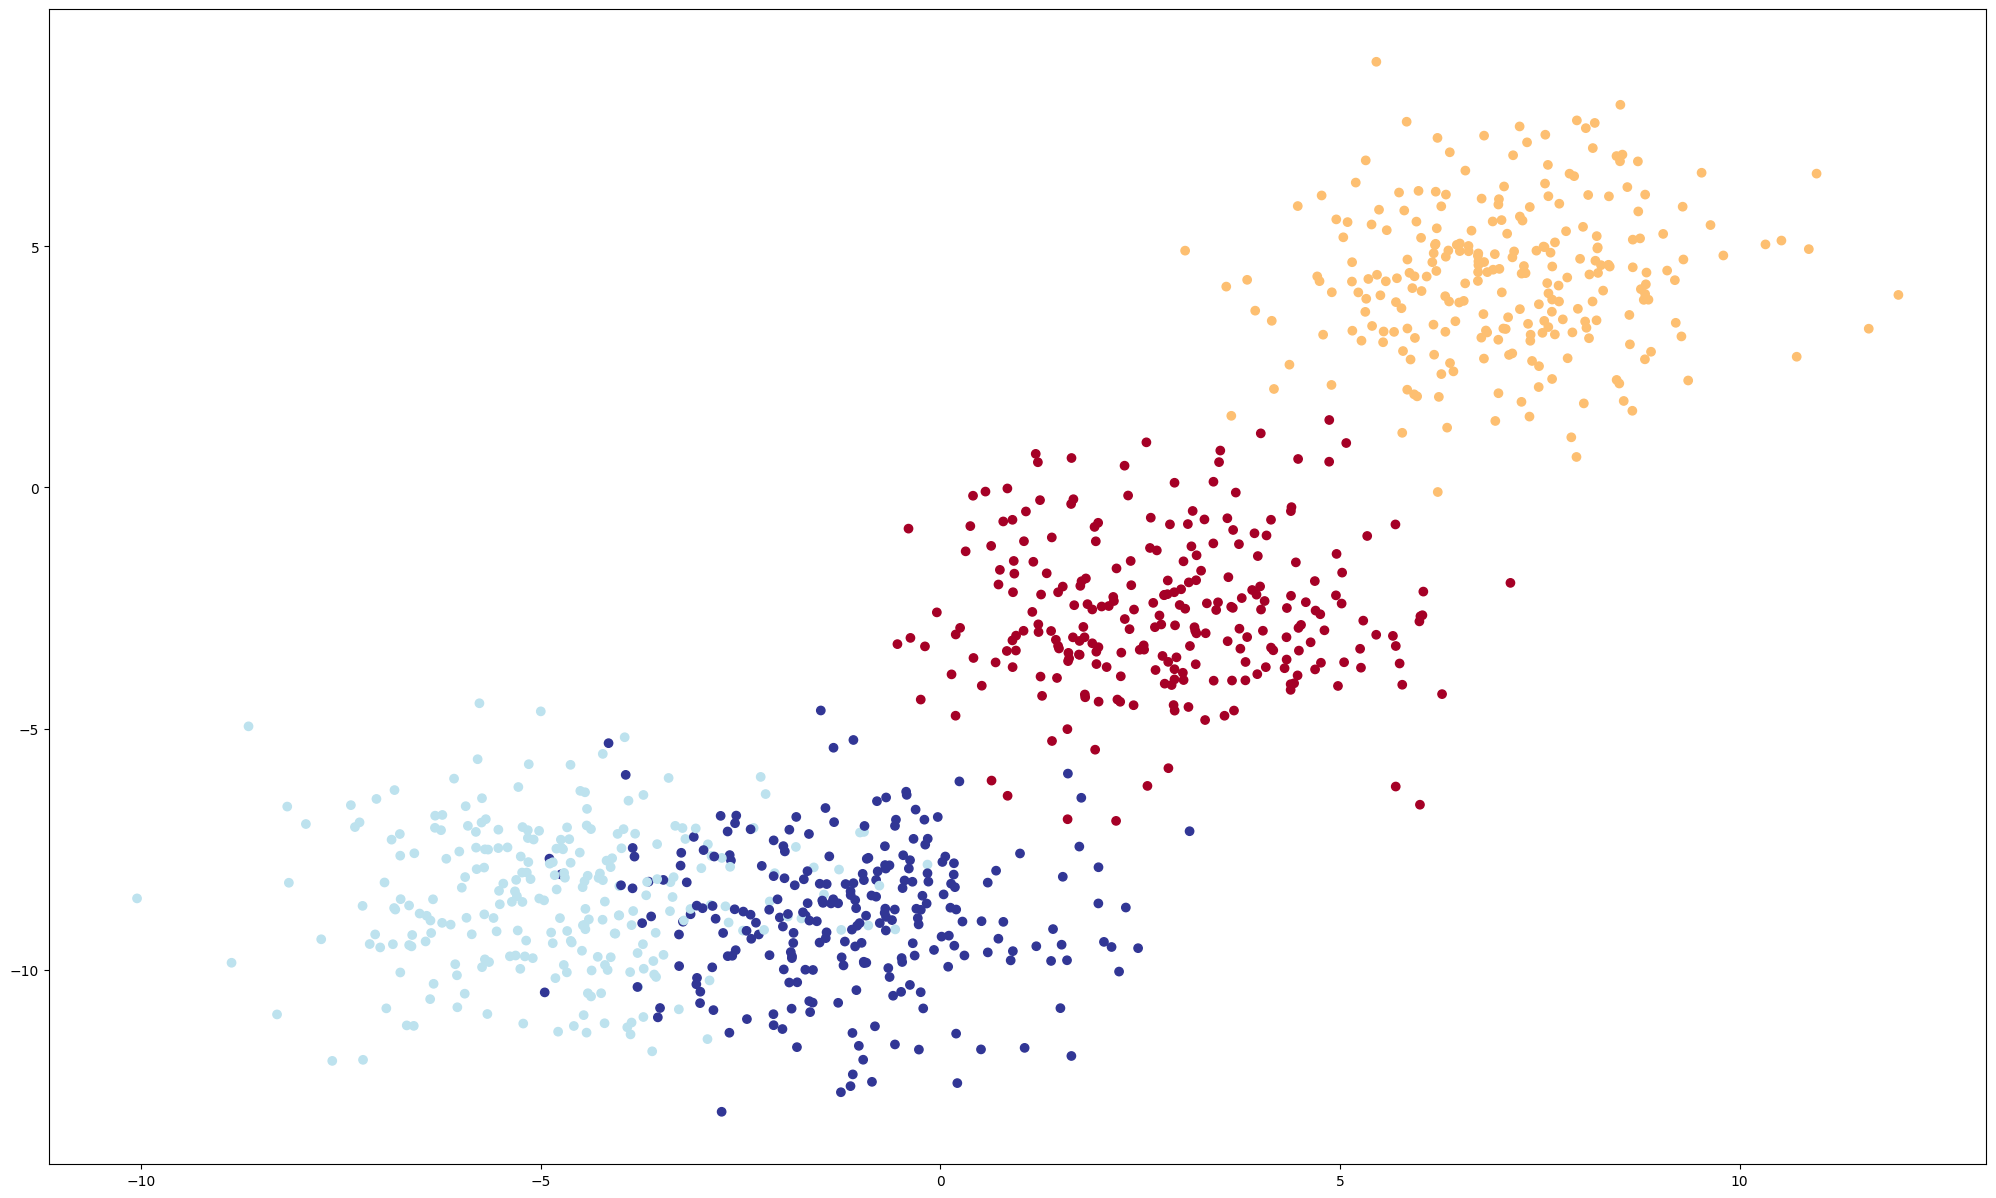

In [55]:
# 4. Plot data
plt.figure(figsize=(25, 15))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [56]:
device

'cuda'

### 8.2 Building a multi-class classification model in PyTorch

In [57]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [58]:
from torch import nn
# Build model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features= hidden_units),
        nn.ReLU(),  # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
        nn.Linear(in_features = hidden_units, out_features= hidden_units),
        nn.ReLU(),  # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
        nn.Linear(in_features = hidden_units, out_features= hidden_units),
        nn.ReLU(),  # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
        nn.Linear(in_features = hidden_units, out_features= hidden_units),
        nn.ReLU(),  # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
        nn.Linear(in_features = hidden_units, out_features= output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instane of blobModel and send it to the target device
model_4 = BlobModel(input_features = 2, output_features= 4, hidden_units = 32).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=4, bias=True)
  )
)

### 8.3 Creating a loss function and optimizer for a multi-class PyTorch model

Since we are working on a multi-class classification problem, we'll use CrossEntropyLoss as our Loss function.

In [59]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr = 0.001)

### 8.4 Getting prediction probabilities for a multi class PyTorch model

Alright, we've got a loss function and optimzier ready, and we're ready to train out model but before we do let's do a single forward pass with out model to see if it works.

In [60]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[-0.0037, -0.0373, -0.0860, -0.0997],
        [-0.0914,  0.0129, -0.0476, -0.1585],
        [-0.0043, -0.0166, -0.0202, -0.0955],
        [-0.1356, -0.0161, -0.1154, -0.2201],
        [ 0.0042, -0.0380, -0.0632, -0.0980]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [61]:
X_blob_train.shape

torch.Size([800, 2])

In [62]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, Num_Classes


(torch.Size([4]), 4)

In [63]:
model_4(X_blob_train.to(device))[0]

tensor([-0.0037, -0.0373, -0.0860, -0.0997], device='cuda:0',
       grad_fn=<SelectBackward0>)

As in, how do we go from logits -> prediction probabilities -> prediction labels just like we did with the binary classification problem?

The softmax function calculates the probability of each prediction class being the actual predicted class compared to all other possible classes.

In [64]:
# Mkae prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.0078, -0.0050, -0.0353, -0.0749],
        [ 0.0047, -0.0548, -0.0903, -0.1025],
        [ 0.0191, -0.0043, -0.0266, -0.0668],
        [-0.0005, -0.0448, -0.0883, -0.1012],
        [-0.0010, -0.0303, -0.0759, -0.0945]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.2587, 0.2554, 0.2478, 0.2382],
        [0.2667, 0.2513, 0.2425, 0.2396],
        [0.2598, 0.2537, 0.2481, 0.2384],
        [0.2648, 0.2533, 0.2425, 0.2394],
        [0.2625, 0.2549, 0.2435, 0.2391]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [65]:
y_logits.dtype

torch.float32

In [66]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

We can check which index has the highest value using torch.argmax().



In [67]:
# Ehich class does the model think is **most** likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.2587, 0.2554, 0.2478, 0.2382], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(0, device='cuda:0')



You can see the output of torch.argmax() returns 3, so for the features (X) of the sample at index 0, the model is predicting that the most likely class value (y) is 3.

Of course, right now this is just random guessing so it's got a 25% chance of being right (since there's four classes). But we can improve those chances by training the model.

### 8.5 Training and Testing loop for mylti-class PyTorch model

In [68]:
y_blob_train.dtype

torch.int64

In [69]:
# Fit the model
torch.manual_seed(42)

# set number of epochs
epochs = 10000
# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  ### training
  model_4.train()

  # 1. forward pass
  y_logits = model_4(X_blob_train) # model outputs raw logits
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

  #print(y_logits.dtype, y_blob_train.dtype )
  # 2. calculate loss and accuracy
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred = y_pred)

  # 3. Optimzer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    # 1. forward pass:
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim=1)

    # Calculate the loss
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(test_pred, y_blob_test)

    # print out whats happenning
    if epoch % 1000 == 0:
      print(f"Epochs: {epoch} | Loss: {loss:5f} | Accuracy: {acc:5f} | Test_loss: {test_loss:5f} | Test_accuracy: {test_acc}")

Epochs: 0 | Loss: 1.374480 | Accuracy: 48.500000 | Test_loss: 1.372173 | Test_accuracy: 50.0
Epochs: 1000 | Loss: 1.124469 | Accuracy: 69.375000 | Test_loss: 1.114865 | Test_accuracy: 69.5
Epochs: 2000 | Loss: 0.775544 | Accuracy: 66.125000 | Test_loss: 0.759168 | Test_accuracy: 71.0
Epochs: 3000 | Loss: 0.483768 | Accuracy: 91.375000 | Test_loss: 0.463923 | Test_accuracy: 93.0
Epochs: 4000 | Loss: 0.290150 | Accuracy: 91.750000 | Test_loss: 0.266500 | Test_accuracy: 93.5
Epochs: 5000 | Loss: 0.232218 | Accuracy: 91.875000 | Test_loss: 0.207490 | Test_accuracy: 93.0
Epochs: 6000 | Loss: 0.214215 | Accuracy: 91.875000 | Test_loss: 0.189396 | Test_accuracy: 93.0
Epochs: 7000 | Loss: 0.206239 | Accuracy: 92.000000 | Test_loss: 0.181503 | Test_accuracy: 93.0
Epochs: 8000 | Loss: 0.201507 | Accuracy: 91.875000 | Test_loss: 0.176977 | Test_accuracy: 93.0
Epochs: 9000 | Loss: 0.198090 | Accuracy: 92.000000 | Test_loss: 0.173846 | Test_accuracy: 93.0


### 8.6 Making and evaluating predictions with a PyTorch multi-class model


In [70]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
  # Turn prediction logits in prediction probabilites then prediction labels
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim=1)

# View the first 10 predictions
print(f"\n y logits: {y_logits[:10]}\n")

# Compare first 10 model preds and test labels
print(f"Predictions: {y_pred[:10]}\n")
print(f"Labels: {y_blob_test[:10]}\n")
print(f"\n Test Accuracy: {accuracy_fn(y_blob_test, y_pred)}")


 y logits: tensor([[ -0.1820,  -5.8937,   1.4867,   2.9057],
        [ -1.4128, -11.0517,   3.3879,   5.5790],
        [  4.1075,  -3.3274,  -3.6432,   0.6063],
        [ -2.8644, -10.0345,   4.8162,   4.7623],
        [ -3.8439,  -7.4752,   5.6328,   3.0895],
        [  3.6026,  -8.3840,  -2.5279,   3.8470],
        [  3.9230,  -3.2890,  -3.4446,   0.6516],
        [  5.0878,  -3.5206,  -4.7305,   0.3531],
        [ -2.6357,  -8.9177,   4.4437,   4.1776],
        [  2.2864,   8.8608,  -8.4019,  -9.1526]], device='cuda:0')

Predictions: tensor([3, 3, 0, 2, 2, 3, 0, 0, 2, 1], device='cuda:0')

Labels: tensor([3, 3, 0, 3, 2, 3, 0, 0, 3, 1], device='cuda:0')


 Test Accuracy: 93.0


Let's visualize them with plot_decision_boundary(), remember because our data is on the GPU, we'll have to move it to the CPU for use with matplotlib (plot_decision_boundary() does this automatically for us).

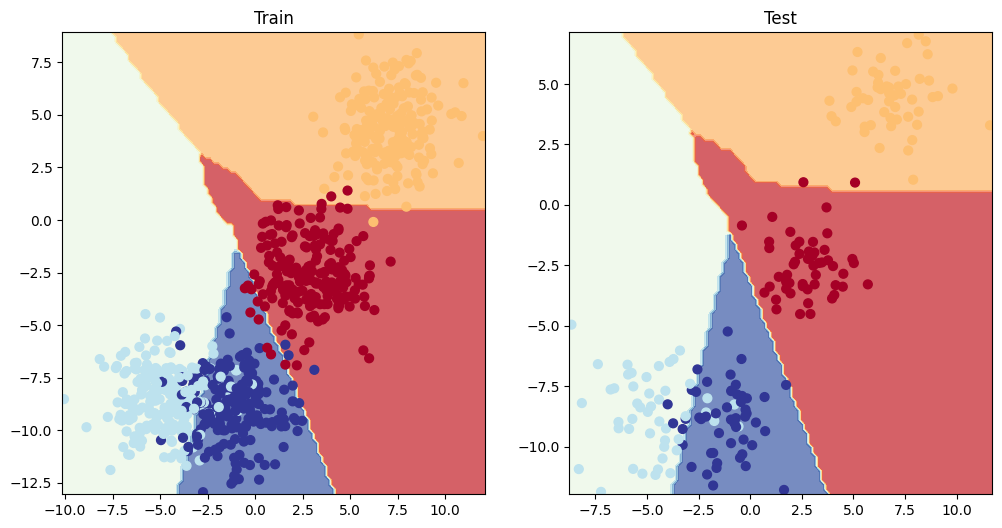

In [71]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [72]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 23.9 MB/s eta 0:00:00


In [73]:
from torchmetrics import Accuracy
# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy:
torchmetrics_accuracy(y_pred, y_blob_test)

tensor(0.9300, device='cuda:0')